## Comparing machine learning models in scikit learn

* How do I choose which model to use for my supervised learning task?
* How do I choose the best tuning parameters for that model?
* How do I estimate the likely performance of my model on out-of-sample data?

A model evaluation procedure is a procedure that allows us to estimate how likely performance of our model in out of sample data. 

With such a procedure we can choose between different models

In [3]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
X = iris.data
y = iris.target

## Procedure 1: Train and test on the entire dataset

1. Train the model on the entire dataset
2. Test the model's predictions on the same dataset and evaluate how well we did comparing the predicted response values with the true reponse values

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred = logreg.predict(X)

### Classification accuracy:
* **Proportion** of correct predictions
* Common evaluation metric for classification problems

In [11]:
from sklearn import metrics

In [12]:
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


* This is known as **training accuracy** when you train and test on the same data.

In [16]:
# KNN WITH 5 NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
# KNN WITH 1 NEIGHBOR
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


However we cannot from this procedure that the KNN with 1 neighbor is the best model since by definition that algorithm will always select the correct label for each training point since it is the closest to itself. 

Since we saw earlier training and testing our model on the same data is not the best option to estimate the performance of our model in out of sample data.

* Maximizing training accuracy rewards **overly complex models** that won't necessarily generalize.
* Unnecesarily complex models **overfit** the training data (the models learns the noise rather than the signal).

## Procedure 2: Train/test split (sometimes called validation set approach, although it may refer to sth different)

1. Split the dataset into two pieces: a training set and a testing se
2. Train the model on the training set
3. Test the model on the testing set and evaluate how well it did.


In [18]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=4)

With this procedure:

* Model can be trained and tested on different data
* Response values are known for the testing set, and thus predictions can be evaluated 
* Testing accuracy is a better estimate than training accuracy of out-of-sample performance

In [34]:
print(X_test.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(60, 4) (60, 4)
(60,) (60,)


In [35]:
#LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [36]:
#K NEAREST NEIGHBORS WITH K = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
#K NEAREST NEIGHBORS WITH K = 1
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Can we locate an even better value for K? 

In [38]:
#K NEAREST NEIGHBORS WITH K = 1, 25
A = []
k_range = range(1,25)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    A.append(metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Testing accuracy')

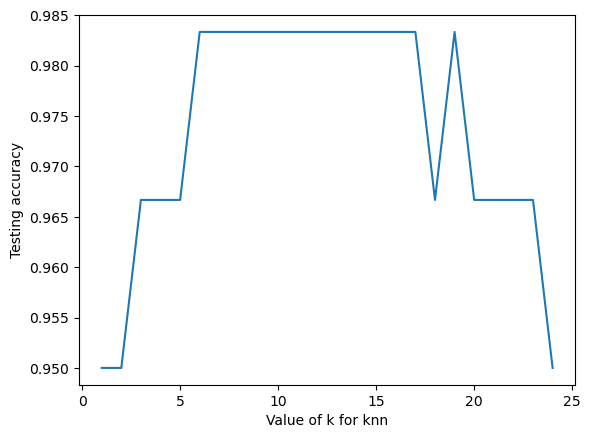

In [39]:
import matplotlib.pyplot as plt
# Allow plots to appear within the notebook

%matplotlib inline

plt.plot(k_range, A)
plt.xlabel("Value of k for knn")
plt.ylabel("Testing accuracy")

As insights:

* **Training accuracy** rises as the complexity increases (always rises)
* **Testing accuracy** penalizes models that are too complex or not complex enough (it rises then falls)
* For KNN models, complexity is determined by the value of K (lower value = more complex)

Once we have chosen a model and its optimal parameters and are ready to make predictions on out of sample data.

It is important to **RE-TRAIN THE MODEL ON ALL OF THE AVILABLE TRAINING DATA**. Otherwise we will be throwing away valuable training data. 

## Re training the best model with all available training data

In [41]:
# Suppose we choose KNN with k=11 as the best model now retrain the model using that parameter
knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

In [46]:
import numpy as np
knn.predict(np.array([[1,2,3,4],[3,5,4,2]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1])

## Downsides to train/test split

* Provides a **high variance estimate** of out of sample accuracy.
* K-fold cross validation overcomes this limitation.
* Train-test split is useful beacuse of its flexibility and speed